<a href="https://colab.research.google.com/github/tesmy-poulose/Healthcare-Financial-Analytics-Dashboard/blob/main/notebooks/Healthcare_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/CostReport_2023_Final.csv')

# Check data
df.head()


,rpt_rec_num,Provider CCN,Hospital Name,Street Address,City,State Code,Zip Code,County,Medicare CBSA Number,Rural Versus Urban,...,Net Income from Service to Patients,Total Other Income,Total Income,Total Other Expenses,Net Income,Cost To Charge Ratio,Net Revenue from Medicaid,Medicaid Charges,Net Revenue from Stand-Alone CHIP,Stand-Alone CHIP Charges
0,747534,110130,IRWIN COUNTY HOSPITAL,710 NORTH IRWIN AVENUE,OCILLA,GA,31774,IRWIN,99911.0,R,...,-1475853.0,227033.0,-1248820.0,NaN,-1248820.0,0.426683,30844.0,140289.0,13.0,212.0
1,748262,144042,LAKE BEHAVIORAL HOSPITAL,2615 WASHINGTON ST,WAUKEGAN,IL,60085,LAKE,29404.0,U,...,1198476.0,1434403.0,2632879.0,NaN,2632879.0,NaN,NaN,NaN,NaN,NaN
2,748457,43036,EVEREST REHABILITATION HOSPITAL BENT,4313 S PLEASANT CROSSING BLVD,ROGERS,AR,72758-1347,BENTON,22220.0,U,...,-997485.0,478980.0,-518505.0,NaN,-518505.0,NaN,NaN,NaN,NaN,NaN
3,748589,454155,OCEANS BEHAVIORAL HOSPITAL CORPUS CH,600 ELIZABETH ST BUILDING B 4TH FLO,CORPUS CHRISTI,TX,78404,NUECES,18580.0,U,...,-2183467.0,170.0,-2183297.0,NaN,-2183297.0,NaN,NaN,NaN,NaN,NaN
4,748617,144043,MONTROSE BEHAVIORAL HEALTH HOSPITAL,4720 NORTH CLARENDON AVENUE,CHICAGO,IL,60640-5122,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Make column names SQL friendly
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("[^a-zA-Z0-9_]", "", regex=True)
)

df.columns


Index(['rpt_rec_num', 'provider_ccn', 'hospital_name', 'street_address',
       'city', 'state_code', 'zip_code', 'county', 'medicare_cbsa_number',
       'rural_versus_urban',
       ...
       'net_income_from_service_to_patients', 'total_other_income',
       'total_income', 'total_other_expenses', 'net_income',
       'cost_to_charge_ratio', 'net_revenue_from_medicaid', 'medicaid_charges',
       'net_revenue_from_standalone_chip', 'standalone_chip_charges'],
      dtype='object', length=117)

In [3]:
df.shape

(6103, 117)

In [4]:
df.isnull().sum().sort_values(ascending=False)


,0
drg_amounts_other_than_outlier_payments,6103
outlier_payments_for_discharges,6103
hospital_total_days_title_v_for_adults__peds,5987
total_discharges_title_v,5981
hospital_total_discharges_title_v_for_adults__peds,5981
...,...
state_code,0
zip_code,0
hospital_name,0
provider_ccn,0


In [5]:
# Drop columns with >90% missing values
threshold = len(df) * 0.9
df = df.dropna(thresh=threshold, axis=1)

print("New Shape:", df.shape)


New Shape: (6103, 55)


In [6]:
df.columns.tolist()


['rpt_rec_num',
 'provider_ccn',
 'hospital_name',
 'street_address',
 'city',
 'state_code',
 'zip_code',
 'county',
 'medicare_cbsa_number',
 'rural_versus_urban',
 'ccn_facility_type',
 'provider_type',
 'type_of_control',
 'fiscal_year_begin_date',
 'fiscal_year_end_date',
 'fte__employees_on_payroll',
 'total_days_title_xviii',
 'total_days_v__xviii__xix__unknown',
 'number_of_beds',
 'total_bed_days_available',
 'total_discharges_title_xviii',
 'total_discharges_v__xviii__xix__unknown',
 'number_of_beds__total_for_all_subproviders',
 'hospital_total_days_title_xviii_for_adults__peds',
 'hospital_total_days_v__xviii__xix__unknown_for_adults__peds',
 'hospital_number_of_beds_for_adults__peds',
 'hospital_total_bed_days_available_for_adults__peds',
 'hospital_total_discharges_title_xviii_for_adults__peds',
 'hospital_total_discharges_v__xviii__xix__unknown_for_adults__peds',
 'total_salaries_from_worksheet_a',
 'overhead_nonsalary_costs',
 'depreciation_cost',
 'total_costs',
 'inpa

In [8]:
for col in df.columns:
    print(col)


rpt_rec_num
provider_ccn
hospital_name
street_address
city
state_code
zip_code
county
medicare_cbsa_number
rural_versus_urban
ccn_facility_type
provider_type
type_of_control
fiscal_year_begin_date
fiscal_year_end_date
fte__employees_on_payroll
total_days_title_xviii
total_days_v__xviii__xix__unknown
number_of_beds
total_bed_days_available
total_discharges_title_xviii
total_discharges_v__xviii__xix__unknown
number_of_beds__total_for_all_subproviders
hospital_total_days_title_xviii_for_adults__peds
hospital_total_days_v__xviii__xix__unknown_for_adults__peds
hospital_number_of_beds_for_adults__peds
hospital_total_bed_days_available_for_adults__peds
hospital_total_discharges_title_xviii_for_adults__peds
hospital_total_discharges_v__xviii__xix__unknown_for_adults__peds
total_salaries_from_worksheet_a
overhead_nonsalary_costs
depreciation_cost
total_costs
inpatient_total_charges
combined_outpatient__inpatient_total_charges
cash_on_hand_and_in_banks
accounts_receivable
total_current_assets
to

In [9]:
important_cols = [
    "provider_ccn",
    "hospital_name",
    "state_code",
    "city",

    "fiscal_year_begin_date",
    "fiscal_year_end_date",

    "number_of_beds",

    "total_costs",
    "inpatient_total_charges",
    "combined_outpatient__inpatient_total_charges",

    "inpatient_revenue",
    "total_patient_revenue",
    "net_patient_revenue",

    "less_total_operating_expense",
    "net_income_from_service_to_patients"
]

df_final = df[important_cols].copy()

print(df_final.shape)
df_final.head()


(6103, 15)


,provider_ccn,hospital_name,state_code,city,fiscal_year_begin_date,fiscal_year_end_date,number_of_beds,total_costs,inpatient_total_charges,combined_outpatient__inpatient_total_charges,inpatient_revenue,total_patient_revenue,net_patient_revenue,less_total_operating_expense,net_income_from_service_to_patients
0,110130,IRWIN COUNTY HOSPITAL,GA,OCILLA,12/01/2022,01/31/2023,34.0,2463462.0,1892400.0,5773515.0,1892400.0,6290464.0,1557790.0,3033643.0,-1475853.0
1,144042,LAKE BEHAVIORAL HOSPITAL,IL,WAUKEGAN,10/01/2022,12/31/2022,161.0,8111462.0,22372700.0,23333319.0,24175458.0,25136077.0,9784298.0,8585822.0,1198476.0
2,43036,EVEREST REHABILITATION HOSPITAL BENT,AR,ROGERS,01/01/2023,02/28/2023,36.0,2795440.0,2948357.0,2982529.0,2948358.0,2982531.0,1450453.0,2447938.0,-997485.0
3,454155,OCEANS BEHAVIORAL HOSPITAL CORPUS CH,TX,CORPUS CHRISTI,11/17/2022,12/31/2022,42.0,1965696.0,1703505.0,1703505.0,1703505.0,1703505.0,1261761.0,3445228.0,-2183467.0
4,144043,MONTROSE BEHAVIORAL HEALTH HOSPITAL,IL,CHICAGO,10/03/2022,12/31/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_final.columns = df_final.columns.str.lower()
df_final.columns = df_final.columns.str.replace(" ", "_")
df_final.columns = df_final.columns.str.replace("__", "_")

df_final.columns


Index(['provider_ccn', 'hospital_name', 'state_code', 'city',
       'fiscal_year_begin_date', 'fiscal_year_end_date', 'number_of_beds',
       'total_costs', 'inpatient_total_charges',
       'combined_outpatient_inpatient_total_charges', 'inpatient_revenue',
       'total_patient_revenue', 'net_patient_revenue',
       'less_total_operating_expense', 'net_income_from_service_to_patients'],
      dtype='object')

In [11]:
df_final.to_csv("healthcare_finance_clean.csv", index=False)


In [12]:
df_final.head()

,provider_ccn,hospital_name,state_code,city,fiscal_year_begin_date,fiscal_year_end_date,number_of_beds,total_costs,inpatient_total_charges,combined_outpatient_inpatient_total_charges,inpatient_revenue,total_patient_revenue,net_patient_revenue,less_total_operating_expense,net_income_from_service_to_patients
0,110130,IRWIN COUNTY HOSPITAL,GA,OCILLA,12/01/2022,01/31/2023,34.0,2463462.0,1892400.0,5773515.0,1892400.0,6290464.0,1557790.0,3033643.0,-1475853.0
1,144042,LAKE BEHAVIORAL HOSPITAL,IL,WAUKEGAN,10/01/2022,12/31/2022,161.0,8111462.0,22372700.0,23333319.0,24175458.0,25136077.0,9784298.0,8585822.0,1198476.0
2,43036,EVEREST REHABILITATION HOSPITAL BENT,AR,ROGERS,01/01/2023,02/28/2023,36.0,2795440.0,2948357.0,2982529.0,2948358.0,2982531.0,1450453.0,2447938.0,-997485.0
3,454155,OCEANS BEHAVIORAL HOSPITAL CORPUS CH,TX,CORPUS CHRISTI,11/17/2022,12/31/2022,42.0,1965696.0,1703505.0,1703505.0,1703505.0,1703505.0,1261761.0,3445228.0,-2183467.0
4,144043,MONTROSE BEHAVIORAL HEALTH HOSPITAL,IL,CHICAGO,10/03/2022,12/31/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_final = df_final.dropna(subset=[
    "total_costs",
    "total_patient_revenue",
    "net_patient_revenue"
])

print(df_final.shape)


(5865, 15)


In [14]:
df_final["fiscal_year_begin_date"] = pd.to_datetime(df_final["fiscal_year_begin_date"])
df_final["fiscal_year_end_date"] = pd.to_datetime(df_final["fiscal_year_end_date"])


In [15]:
df_final["profit_margin"] = (
    df_final["net_income_from_service_to_patients"] /
    df_final["total_patient_revenue"]
) * 100


In [16]:
df_final["cost_to_revenue_ratio"] = (
    df_final["total_costs"] /
    df_final["total_patient_revenue"]
)


In [17]:
df_final["revenue_per_bed"] = (
    df_final["total_patient_revenue"] /
    df_final["number_of_beds"]
)


In [18]:
df_final.sort_values("profit_margin", ascending=False)[
    ["hospital_name", "state_code", "profit_margin"]
].head(10)


,hospital_name,state_code,profit_margin
2634,AD HOSPITAL EAST LLC,TX,91.516282
2602,ADHC,TX,86.951454
3266,HOLY FAMILY MEMORIAL INC,WI,86.442142
2431,BRISTOW MEDICAL CENTER,OK,81.187602
1085,BANNER OCOTILLO MEDICAL CENTER,AZ,75.661403
4486,CASEY COUNTY HOSPITAL,KY,57.588160
110,MIDWESTERN REGIONAL MEDICAL CENTER,IL,52.063496
640,MUSCOGEE CREEK NATION LONG TERM CARE,OK,51.602827
96,SOUTHEASTERN REGIONAL MEDICAL CENTER,GA,51.500589
86,WESTERN REGIONAL MEDICAL CENTER,AZ,50.556791


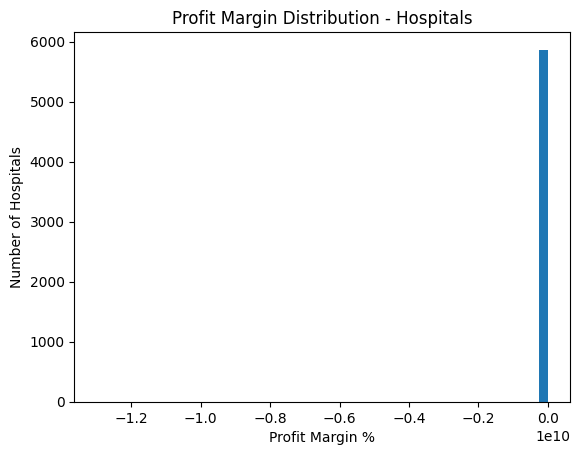

In [19]:
import matplotlib.pyplot as plt

plt.hist(df_final["profit_margin"].dropna(), bins=50)
plt.title("Profit Margin Distribution - Hospitals")
plt.xlabel("Profit Margin %")
plt.ylabel("Number of Hospitals")
plt.show()


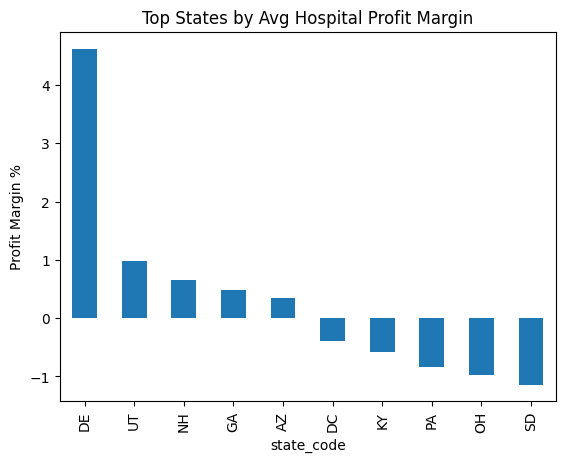

In [20]:
state_profit = df_final.groupby("state_code")["profit_margin"].mean().sort_values(ascending=False)

state_profit.head(10).plot(kind="bar")
plt.title("Top States by Avg Hospital Profit Margin")
plt.ylabel("Profit Margin %")
plt.show()


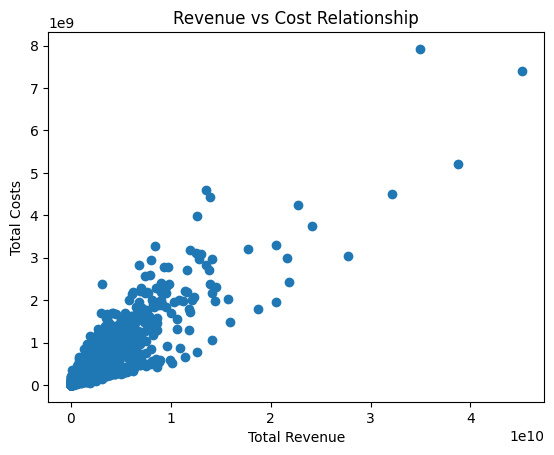

In [21]:
plt.scatter(
    df_final["total_patient_revenue"],
    df_final["total_costs"]
)
plt.xlabel("Total Revenue")
plt.ylabel("Total Costs")
plt.title("Revenue vs Cost Relationship")
plt.show()
